## Multiclass Classification using ANN

In [80]:
import numpy as np
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [81]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [82]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [96]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

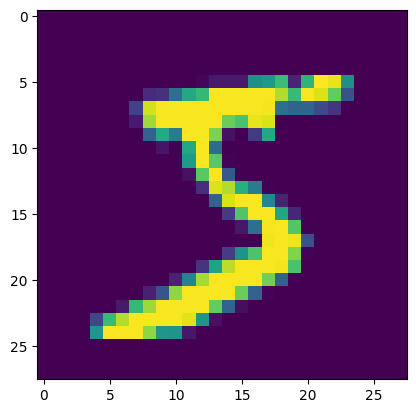

In [83]:
plt.imshow(X_train[0])

In [84]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [85]:
# Scaling 
# Just divide by 255 cuz value of pixels is in range (0, 255) so it will come to (0, 1) range

X_train = X_train/255
X_test = X_test/255

In [86]:
# Building Model

model = Sequential()

model.add(InputLayer(shape=(28,28)))
model.add(Flatten())                          # flatten layer
model.add(Dense(128, activation="relu"))      # hidden layer
model.add(Dense(10, activation="softmax"))    # output layer

In [87]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [89]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8663 - loss: 0.4745 - val_accuracy: 0.9548 - val_loss: 0.1596
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9611 - loss: 0.1346 - val_accuracy: 0.9661 - val_loss: 0.1157
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.0874 - val_accuracy: 0.9712 - val_loss: 0.0945
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9817 - loss: 0.0610 - val_accuracy: 0.9722 - val_loss: 0.0928
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9861 - loss: 0.0469 - val_accuracy: 0.9693 - val_loss: 0.1004
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9901 - loss: 0.0348 - val_accuracy: 0.9746 - val_loss: 0.0839
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0284 - val_accuracy: 0.9732 - val_loss: 0.0901
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9931 - loss: 0.0234 - 

In [90]:
y_pred_prob = model.predict(X_test)
y_pred_prob[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.3269820e-07, 1.9894272e-11, 1.0167889e-06, 4.0986502e-04,
       3.7301847e-14, 3.3312733e-09, 1.1389149e-13, 9.9957424e-01,
       6.5789396e-09, 1.4794043e-05], dtype=float32)

In [91]:
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [92]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9765

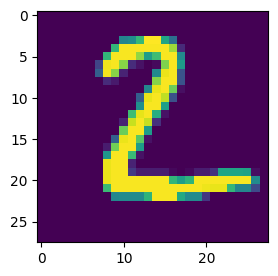

In [93]:
# Testing out

plt.figure(figsize=(3,3))
plt.imshow(X_test[1])

In [94]:
model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis=1)     # yayy it predicts 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([2])

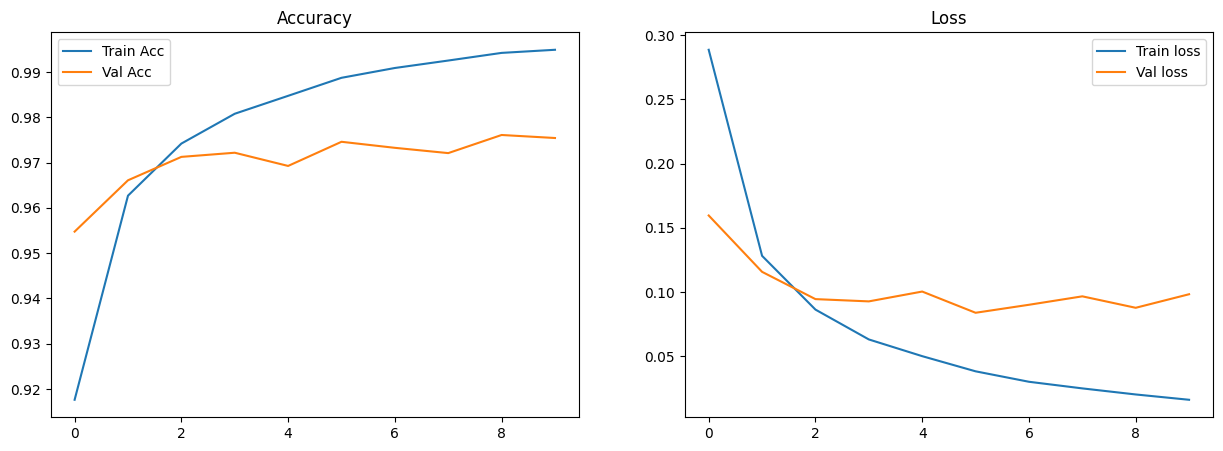

In [99]:
# PLOTTING

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

ax[0].plot(history.history["accuracy"], label="Train Acc")
ax[0].plot(history.history["val_accuracy"], label="Val Acc")
ax[1].plot(history.history["loss"], label="Train loss")
ax[1].plot(history.history["val_loss"], label="Val loss")

ax[0].legend()
ax[1].legend()
ax[0].set_title("Accuracy")
ax[1].set_title("Loss")

plt.show()

### Inference
- Train accuracy slightly higher than Validation accuracy - slight overfittig
- Same can be seen from Loss curves